Import Libraries

In [1]:
pip install tabulate

In [66]:
import pandas as peacepd
import numpy as peacenp
import matplotlib.pyplot as peaceplt
import seaborn as peacesns
import requests
import yfinance as yfin
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster
import scipy.cluster.hierarchy as peacesch
from tabulate import tabulate
from bs4 import BeautifulSoup
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import fcluster
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score, mean_squared_error
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# **QUESTION 1 - PCA**

In [3]:
url = "https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components"

1.3 - Correlation Matrix for PCA and Bar Graphs for First and Second Principal Components

In [4]:
response = requests.get(url)
beauty_soup = BeautifulSoup(response.text, "html.parser")
table = beauty_soup.find('table', {'class': 'wikitable'})

In [5]:
# For the headers
headers = [header.get_text(strip=True) for header in table.find_all('th')]

# For each rows
rows = []
for row in table.find_all('tr'):
    cells = row.find_all('td')
    if cells:
        rows.append([cell.get_text(strip=True) for cell in cells])

# Print the table in tabular format
print(tabulate(rows, headers=headers, tablefmt='orgtbl'))

| Company   | Exchange   | Symbol                       | Industry   | Date added                            | Notes   |
|-----------+------------+------------------------------+------------+---------------------------------------+---------|
| NYSE      | MMM        | Conglomerate                 | 1976-08-09 | As Minnesota Mining and Manufacturing | 1.84%   |
| NYSE      | AXP        | Financial services           | 1982-08-30 |                                       | 4.06%   |
| NASDAQ    | AMGN       | Biopharmaceutical            | 2020-08-31 |                                       | 4.01%   |
| NASDAQ    | AMZN       | Retailing                    | 2024-02-26 |                                       | 2.87%   |
| NASDAQ    | AAPL       | Information technology       | 2015-03-19 |                                       | 3.18%   |
| NYSE      | BA         | Aerospaceanddefense          | 1987-03-12 |                                       | 1.98%   |
| NYSE      | CAT        | Const

In [6]:
# Selection of Ticker symbols from the displayed table
tickers = []
if table:
    rows = table.find_all('tr')[1:]
    for row in rows:
        cells = row.find_all('td')[1]
        if cells:
            tickers.append(cells.text.strip())
else:
    print("Table does not exist on the webpage.")

print("Dow Jones Industrial Average Ticker Symbols:")
for ticker in tickers:
    print(ticker + ",", end=" ")

Dow Jones Industrial Average Ticker Symbols:
MMM, AXP, AMGN, AMZN, AAPL, BA, CAT, CVX, CSCO, KO, DIS, GS, HD, HON, IBM, JNJ, JPM, MCD, MRK, MSFT, NKE, NVDA, PG, CRM, SHW, TRV, UNH, VZ, V, WMT, 

In [7]:
start_date = "2019-01-01"
end_date = "2020-01-01"
dow_jones = yfin.download(tickers, start = start_date, end = end_date)['Adj Close']

[*********************100%***********************]  30 of 30 completed


In [8]:
dow_jones_return = dow_jones.pct_change()

In [9]:
correlation_matrix = dow_jones_return.corr()
correlation_matrix

Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,1.000000,0.279305,0.592889,0.553372,0.322494,0.516472,0.432027,0.528582,0.369184,0.293887,...,0.621905,0.482050,0.585341,0.191479,0.325254,0.297577,0.209529,0.539324,0.082167,0.173716
AMGN,0.279305,1.000000,0.240433,0.343888,0.127062,0.255555,0.270269,0.241407,0.226773,0.189902,...,0.266598,0.264549,0.284021,0.182810,0.266795,0.202897,0.162261,0.318034,0.162638,0.113134
AMZN,0.592889,0.240433,1.000000,0.564411,0.283184,0.473405,0.492060,0.473744,0.347007,0.256239,...,0.723119,0.447349,0.567440,0.256638,0.342126,0.299157,0.241830,0.539110,0.123414,0.334932
AXP,0.553372,0.343888,0.564411,1.000000,0.302613,0.522328,0.433294,0.515304,0.426028,0.372838,...,0.658184,0.545812,0.524489,0.306774,0.433450,0.457302,0.267396,0.646535,0.194974,0.372826
BA,0.322494,0.127062,0.283184,0.302613,1.000000,0.404223,0.325532,0.277737,0.236138,0.162914,...,0.356726,0.279940,0.293180,0.087350,0.211762,0.129754,0.054098,0.252535,0.061810,0.130041
CAT,0.516472,0.255555,0.473405,0.522328,0.404223,1.000000,0.358344,0.423639,0.450541,0.253054,...,0.442663,0.429391,0.556340,0.097547,0.340204,0.200726,0.214979,0.331605,0.180280,0.216327
CRM,0.432027,0.270269,0.492060,0.433294,0.325532,0.358344,1.000000,0.403257,0.278857,0.211930,...,0.617597,0.367392,0.425763,0.268850,0.311772,0.314751,0.269333,0.593641,0.170779,0.274814
CSCO,0.528582,0.241407,0.473744,0.515304,0.277737,0.423639,0.403257,1.000000,0.382062,0.313796,...,0.551748,0.502219,0.496778,0.271928,0.278591,0.280708,0.220932,0.427500,0.178254,0.165709
CVX,0.369184,0.226773,0.347007,0.426028,0.236138,0.450541,0.278857,0.382062,1.000000,0.058819,...,0.392360,0.347073,0.464774,0.081773,0.207829,0.196985,0.229149,0.335930,0.171509,0.200561


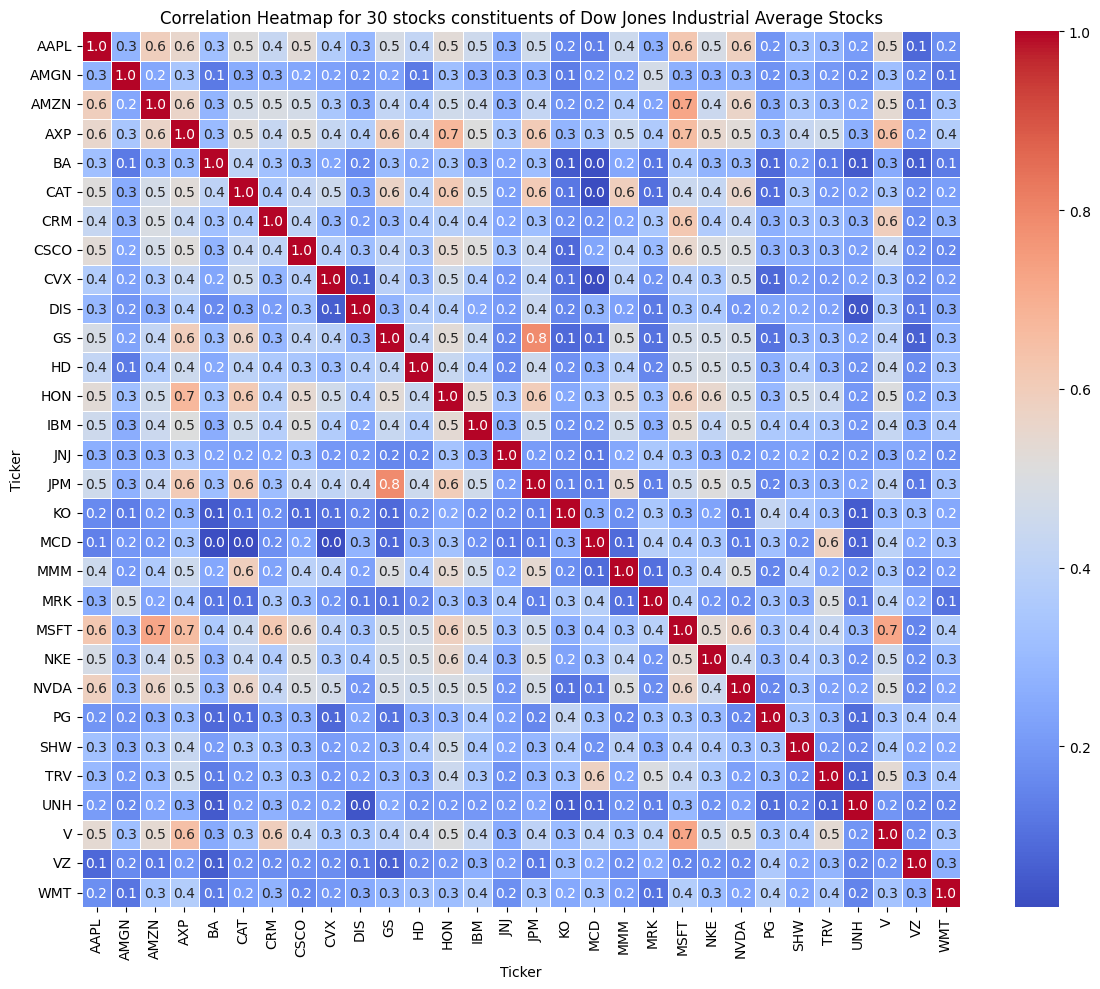

In [10]:
peaceplt.figure(figsize=(12, 10))
peacesns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5, cbar=True)
peaceplt.title('Correlation Heatmap for 30 stocks constituents of Dow Jones Industrial Average Stocks')
peaceplt.xticks(rotation=90)
peaceplt.yticks(rotation=0)
peaceplt.tight_layout()
peaceplt.show()

In [11]:
# Perform Principal Component Analysis

pca = PCA()
pca.fit(correlation_matrix)
pca_components = pca.components_

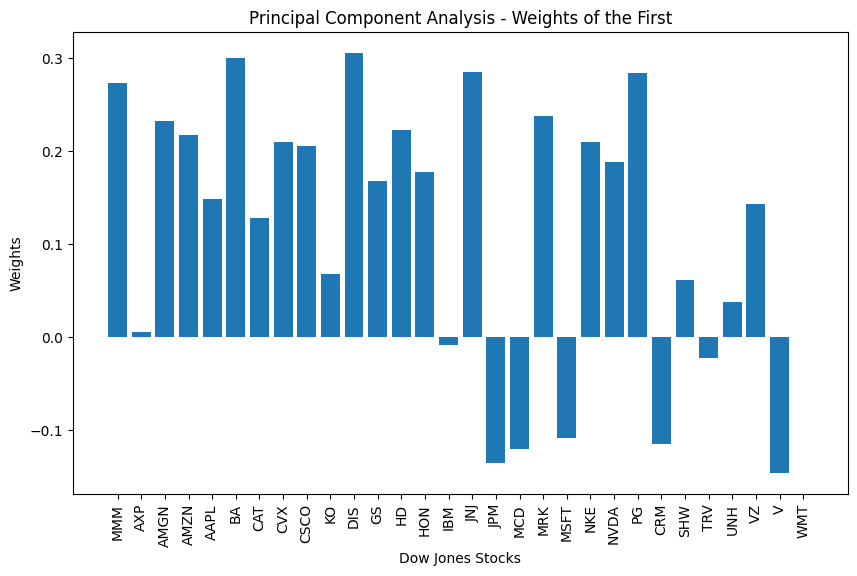

In [12]:
# First Principal Component

peaceplt.figure(figsize=(10, 6))
peaceplt.bar(tickers, pca_components[0])
peaceplt.title("Principal Component Analysis - Weights of the First")
peaceplt.xlabel("Dow Jones Stocks")
peaceplt.ylabel("Weights")
peaceplt.xticks(rotation=90)
peaceplt.show()

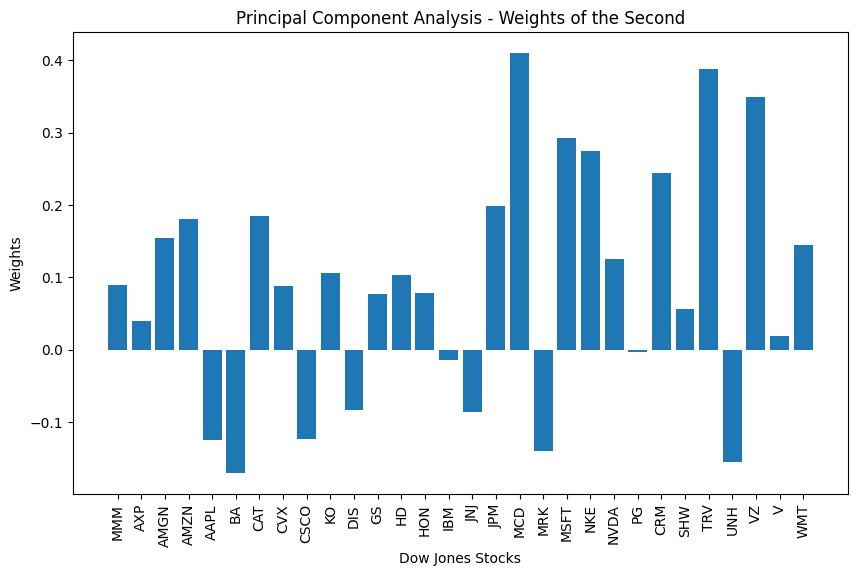

In [13]:
# Second Principal Component

peaceplt.figure(figsize=(10, 6))
peaceplt.bar(tickers, pca_components[1])
peaceplt.title("Principal Component Analysis - Weights of the Second")
peaceplt.xlabel("Dow Jones Stocks")
peaceplt.ylabel("Weights")
peaceplt.xticks(rotation=90)
peaceplt.show()

1.4 - Explained Variance and Scree Plot

In [14]:
# Explained Variance ratio
ex_variance = pca.explained_variance_ratio_

# Cumulative explained variance ratio
cumul_variance = peacenp.cumsum(ex_variance)

# Number of components for 95% variance
number_of_components_95 = peacenp.where(cumul_variance >= 0.95)[0][0] + 1
# number_of_components_95 = peacenp.argmax(cumul_variance >= 0.95) + 1

print("Number of components for 95% variance:", number_of_components_95)

Number of components for 95% variance: 17


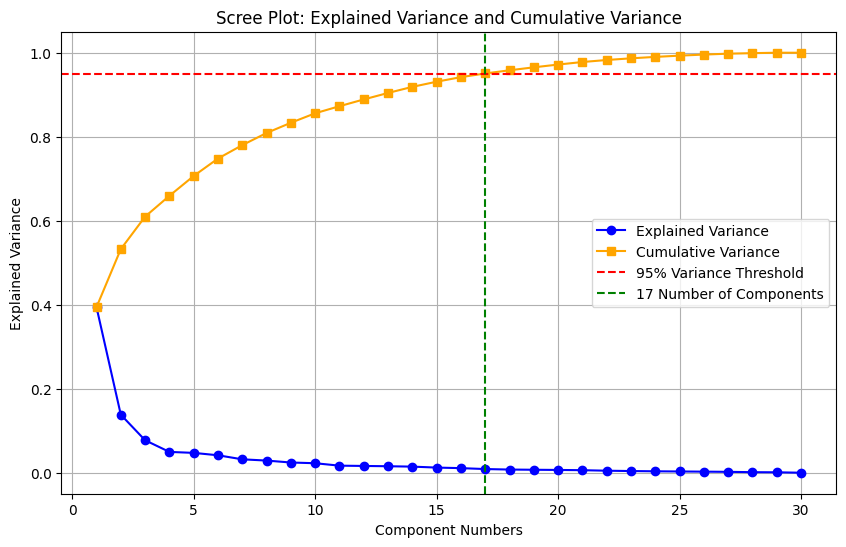

In [15]:
peaceplt.figure(figsize=(10, 6))
peaceplt.plot(range(1, len(ex_variance) + 1), ex_variance, marker='o', linestyle='-', color='blue', label='Explained Variance')
peaceplt.plot(range(1, len(cumul_variance) + 1), cumul_variance, marker='s', color='orange', label='Cumulative Variance')
peaceplt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Threshold')
peaceplt.axvline(x=number_of_components_95, color='g', linestyle='--', label=f'{number_of_components_95} Number of Components')
peaceplt.title("Scree Plot: Explained Variance and Cumulative Variance")
peaceplt.xlabel("Component Numbers")
peaceplt.ylabel("Explained Variance")
peaceplt.legend()
peaceplt.grid(True)
peaceplt.show()

1.5 - Scatter Plot for the First Two Principal Components and Euclidean Distance

In [16]:
pca_components[0]

array([ 2.72914674e-01,  5.53878988e-03,  2.31898861e-01,  2.17147402e-01,
        1.48834474e-01,  2.99731908e-01,  1.28084327e-01,  2.09157175e-01,
        2.04933010e-01,  6.75082347e-02,  3.05307615e-01,  1.68083914e-01,
        2.22973388e-01,  1.77923403e-01, -8.60671157e-03,  2.85221390e-01,
       -1.35855583e-01, -1.20130020e-01,  2.37672589e-01, -1.08639676e-01,
        2.09288163e-01,  1.87872692e-01,  2.83924940e-01, -1.14970638e-01,
        6.13259603e-02, -2.31110877e-02,  3.75561261e-02,  1.42647487e-01,
       -1.46399093e-01, -4.26812142e-05])

In [17]:
pca_components[1]

array([ 0.0887748 ,  0.03902948,  0.15425294,  0.18054383, -0.1246787 ,
       -0.17045   ,  0.18479436,  0.08816086, -0.1232745 ,  0.10601877,
       -0.08362251,  0.07629992,  0.1036274 ,  0.07888325, -0.01362707,
       -0.08583046,  0.19838103,  0.40978816, -0.13962842,  0.29318209,
        0.27463871,  0.12476617, -0.00372433,  0.24481178,  0.05654027,
        0.3873374 , -0.15529141,  0.34876471,  0.01896063,  0.14460274])

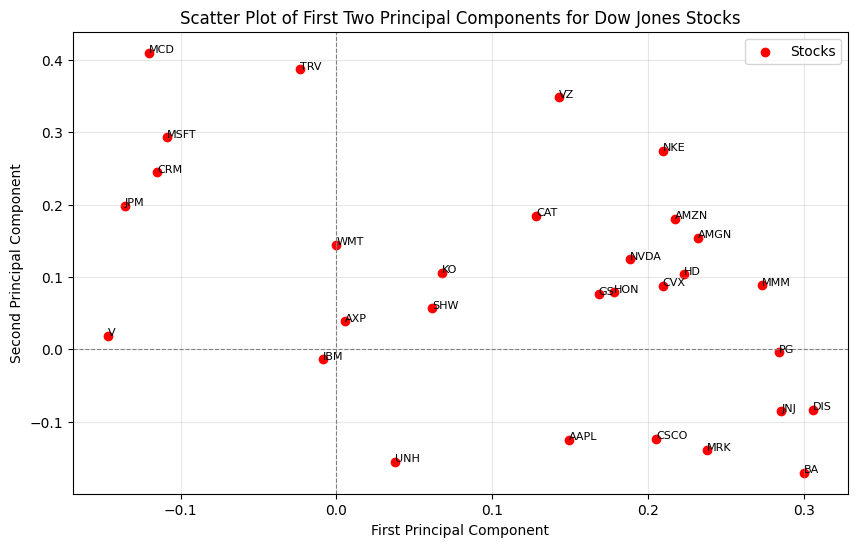

In [18]:
peaceplt.figure(figsize=(10, 6))
peaceplt.scatter(pca_components[0], pca_components[1], color='r', label='Stocks')

for i, txt in enumerate(tickers):
    peaceplt.text(pca_components[0][i], pca_components[1][i], txt, fontsize=8)

peaceplt.axvline(x=0, color='grey', linestyle='--', linewidth=0.8)
peaceplt.axhline(y=0, color='grey', linestyle='--', linewidth=0.8)
peaceplt.title("Scatter Plot of First Two Principal Components for Dow Jones Stocks")
peaceplt.xlabel("First Principal Component")
peaceplt.ylabel("Second Principal Component")
peaceplt.grid(alpha=0.3)
peaceplt.legend()
peaceplt.show()

In [19]:
pca1_mean = peacenp.mean(pca_components[0])
pca2_mean = peacenp.mean(pca_components[1])

print("Mean of the First Principal Component, PCA1:", pca1_mean)
print("Mean of the Second Principal Component, PCA2:", pca2_mean)

Mean of the First Principal Component, PCA1: 0.11492636772803065
Mean of the Second Principal Component, PCA2: 0.09006772898567235


In [20]:
stock_distances = {}

# Calculate Euclidean Distances for each stock from the mean value
for i, stock in enumerate(tickers):
    stock_coordinates = peacenp.array([pca_components[0][i], pca_components[1][i]])
    distance = peacenp.linalg.norm(stock_coordinates - peacenp.array([pca1_mean, pca2_mean]))
    stock_distances[stock] = distance

# Sorting the Dictionary distances in descending order
sorted_distances = sorted(stock_distances.items(), key=lambda x: x[1], reverse=True)

# The three most distant stocks
most_distant_stocks = sorted_distances[:3]

# Displaying the sorted distances
print("Most distant stocks from the mean:")
print(tabulate(most_distant_stocks, headers=['Stocks', 'Distance'], tablefmt='grid'))

Most distant stocks from the mean:
+----------+------------+
| Stocks   |   Distance |
+==========+============+
| MCD      |   0.396828 |
+----------+------------+
| TRV      |   0.327755 |
+----------+------------+
| BA       |   0.31941  |
+----------+------------+


In [21]:
# Dictionary to store distances for each component
most_distant_per_component = {}

# Loop over the first two principal components
for component_idx in range(2):
    distances = {}
    mean_value = peacenp.mean(pca_components[component_idx])

    # Calculate the absolute deviation for each stock
    for i, stock in enumerate(tickers):
        distance = abs(pca_components[component_idx][i] - mean_value)
        distances[stock] = distance

    # Sort distances in descending order and take the top 3 stocks
    sorted_distances = sorted(distances.items(), key=lambda x: x[1], reverse=True)
    most_distant_per_component[f"PCA{component_idx + 1}"] = sorted_distances[:3]

# Displaying results
for component, distant_stocks in most_distant_per_component.items():
    print(f"Most distant stocks for {component}:")
    print(tabulate(distant_stocks, headers=['Stocks', 'Distance'], tablefmt='grid'))
    print("\n")

Most distant stocks for PCA1:
+----------+------------+
| Stocks   |   Distance |
+==========+============+
| V        |   0.261325 |
+----------+------------+
| JPM      |   0.250782 |
+----------+------------+
| MCD      |   0.235056 |
+----------+------------+


Most distant stocks for PCA2:
+----------+------------+
| Stocks   |   Distance |
+==========+============+
| MCD      |   0.31972  |
+----------+------------+
| TRV      |   0.29727  |
+----------+------------+
| BA       |   0.260518 |
+----------+------------+




# **QUESTION 2 - DENDROGRAM**

2.3 - Compute Pairwise Distances using Correlation Matrix

In [22]:
distance_matrix = peacenp.sqrt(2 * (1 - correlation_matrix))

df_distance = peacepd.DataFrame(distance_matrix, index=tickers, columns=tickers)
print("Pairwise Distance Matrix:")
print(tabulate(df_distance, headers="keys", tablefmt="grid"))

Pairwise Distance Matrix:
+------+----------+----------+---------+----------+----------+---------+----------+---------+----------+---------+---------+----------+---------+----------+----------+---------+----------+----------+---------+----------+----------+----------+---------+----------+---------+----------+---------+---------+----------+---------+
|      |      MMM |      AXP |    AMGN |     AMZN |     AAPL |      BA |      CAT |     CVX |     CSCO |      KO |     DIS |       GS |      HD |      HON |      IBM |     JNJ |      JPM |      MCD |     MRK |     MSFT |      NKE |     NVDA |      PG |      CRM |     SHW |      TRV |     UNH |      VZ |        V |     WMT |
+======+==========+==========+=========+==========+==========+=========+==========+=========+==========+=========+=========+==========+=========+==========+==========+=========+==========+==========+=========+==========+==========+==========+=========+==========+=========+==========+=========+=========+==========+=======

2.4 - Create a Dendrogram using the Linkage approach

<ipython-input-23-7671d9a1241b>:2: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = peacesch.linkage(distance_matrix, method='average')


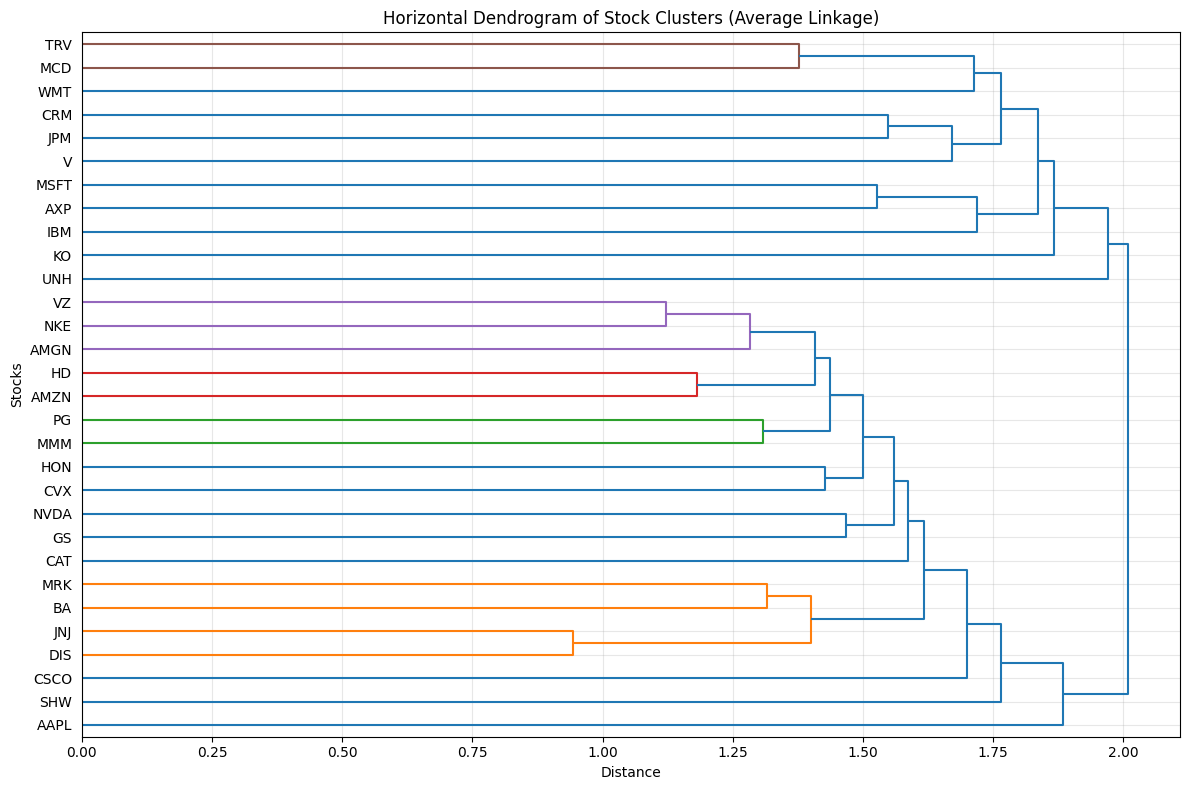

In [23]:
# Perform hierarchical clustering
linkage_matrix = peacesch.linkage(distance_matrix, method='average')

# Plot the dendrogram
peaceplt.figure(figsize=(12, 8))
dendrogram = peacesch.dendrogram(
    linkage_matrix,
    orientation='right',
    labels=tickers,
    leaf_font_size=10
)
peaceplt.title("Horizontal Dendrogram of Stock Clusters (Average Linkage)")
peaceplt.xlabel("Distance")
peaceplt.ylabel("Stocks")
peaceplt.grid(alpha=0.3)
peaceplt.tight_layout()
peaceplt.show()

2.5 - Create Clusters using Linkage Method

In [24]:
# Extract the Clusters
cluster_num = 3
clusters = fcluster(linkage_matrix, t=cluster_num, criterion='maxclust')

# Group Stocks by Clusters
clustered_stocks = {}
 #{i: [] for i in range(1, cluster_num + 1)}
for stock, cluster_id in zip(tickers, clusters):
    clustered_stocks.setdefault(cluster_id, []).append(stock)

# Print the Clusters
for cluster_id, stocks in clustered_stocks.items():
    print(f"Cluster {cluster_id}: {stocks}")

Cluster 1: ['MMM', 'AMGN', 'AMZN', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'DIS', 'GS', 'HD', 'HON', 'JNJ', 'MRK', 'NKE', 'NVDA', 'PG', 'SHW', 'VZ']
Cluster 2: ['AXP', 'KO', 'IBM', 'JPM', 'MCD', 'MSFT', 'CRM', 'TRV', 'V', 'WMT']
Cluster 3: ['UNH']


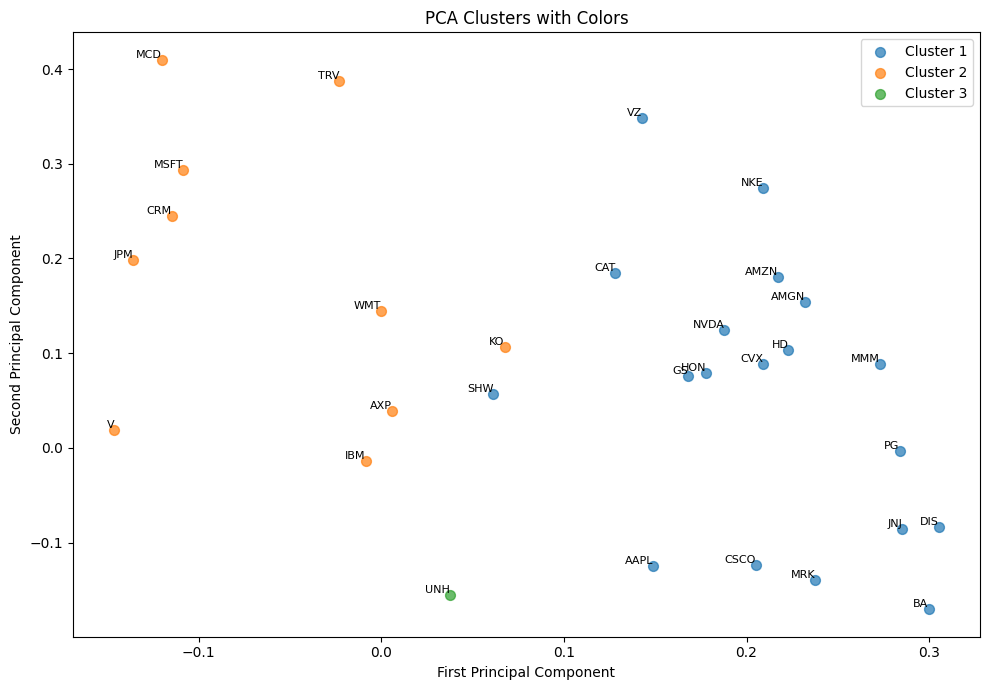

In [25]:

# Add cluster labels to PCA components
pca_df = peacepd.DataFrame({'PCA1': pca_components[0], 'PCA2': pca_components[1], 'Cluster': clusters}, index=tickers)

# Plot clusters
peaceplt.figure(figsize=(10, 7))
colors = ListedColormap(['red', 'blue', 'green'])

for cluster_id in range(1, 4):
    cluster_points = pca_df[pca_df['Cluster'] == cluster_id]
    peaceplt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster_id}', s=50, alpha=0.7)

    # Annotate each data point with its ticker
    # for i, txt in enumerate(cluster_points.index):
    #     peaceplt.annotate(txt, (cluster_points['PCA1'].iloc[i], cluster_points['PCA2'].iloc[i]), fontsize=8)
    for ticker, row in cluster_points.iterrows():
        peaceplt.text(row['PCA1'], row['PCA2'], ticker, fontsize=8, ha='right', va='bottom', color='black')

peaceplt.title("PCA Clusters with Colors")
peaceplt.xlabel("First Principal Component")
peaceplt.ylabel("Second Principal Component")
peaceplt.legend()
peaceplt.tight_layout()
peaceplt.show()

# **QUESTION 3 - ENSEMBLES FOR CLASSIFICATION**

**3.4 - Construction of Random Forest Model**

In [26]:
df_titanic = peacepd.read_csv('titanic3.csv')
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [27]:
# Select relevant features for the Predictor and the Target

predictors = [['pclass', 'sex', 'age', 'fare']]
target = ['survived']

In [28]:
# Create a dataframe combining the selected columns

df_useful = df_titanic[predictors[0] + target]
df_useful.head()

,pclass,sex,age,fare,survived
0,1,female,29.00,211.3375,1
1,1,male,0.92,151.5500,1
2,1,female,2.00,151.5500,0
3,1,male,30.00,151.5500,0
4,1,female,25.00,151.5500,0


In [29]:
# Impute the missing values in the age column with the mean

age_mean = df_useful['age'].median()
df_useful['age'] = df_useful['age'].fillna(age_mean)
df_useful['fare'] = df_useful['fare'].fillna(df_useful['fare'].median())

df_useful['age']
print("\n")
df_useful['fare']

<ipython-input-29-b185f1eb24e8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['age'] = df_useful['age'].fillna(age_mean)
<ipython-input-29-b185f1eb24e8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['fare'] = df_useful['fare'].fillna(df_useful['fare'].median())


,fare
0,211.3375
1,151.5500
2,151.5500
3,151.5500
4,151.5500
...,...
1304,14.4542
1305,14.4542
1306,7.2250
1307,7.2250


In [30]:
# Transform sex to numerical values where 0 is for "Male" and 1 is for "Female"

df_useful['sex'] = df_useful['sex'].map({'male': 0, 'female': 1})
df_useful['sex']

<ipython-input-30-375e8091c422>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_useful['sex'] = df_useful['sex'].map({'male': 0, 'female': 1})


,sex
0,1
1,0
2,1
3,0
4,1
...,...
1304,1
1305,1
1306,0
1307,0


In [31]:
# Identify the Predictor and Target Variables

X = df_useful[predictors[0]]
y = df_useful[target[0]]

print(X.head())
print("\n")
print(y.head())

   pclass  sex    age      fare
0       1    1  29.00  211.3375
1       1    0   0.92  151.5500
2       1    1   2.00  151.5500
3       1    0  30.00  151.5500
4       1    1  25.00  151.5500


0    1
1    1
2    0
3    0
4    0
Name: survived, dtype: int64


In [32]:
# Split Dataset into training and testing

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

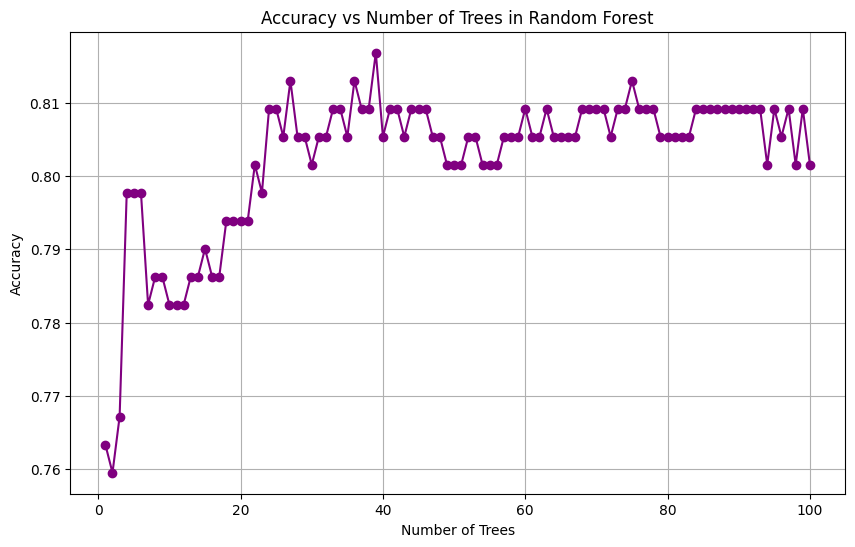

In [33]:
# Train the Random Forest Model with varying tree numbers

tree_numbers = range(1, 101)
accuracy_scores = []

for t in tree_numbers:
    randf_model = RandomForestClassifier(n_estimators=t, random_state=42)
    randf_model.fit(X_train, y_train)
    y_pred = randf_model.predict(X_test)
    accuracy = (y_pred == y_test).mean()
    accuracy_scores.append(accuracy)

# Plot the accuracy vs number of trees
peaceplt.figure(figsize=(10, 6))
peaceplt.plot(tree_numbers, accuracy_scores, marker='o', linestyle='-', color='purple')
peaceplt.title("Accuracy vs Number of Trees in Random Forest")
peaceplt.xlabel("Number of Trees")
peaceplt.ylabel("Accuracy")
peaceplt.grid(True)
peaceplt.show()

In [34]:
# Select the Optimal Number of Trees

optimal_trees = tree_numbers[peacenp.argmax(accuracy_scores)]
print("Optimal Number of Trees:", optimal_trees)

Optimal Number of Trees: 39


**3.5 - Perform ROC Analysis for Logistic Regression, Decision Tree, Random Forest, and KNN**

In [35]:
# Train Models

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=optimal_trees, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

fitted_models = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    fitted_models[name] = model

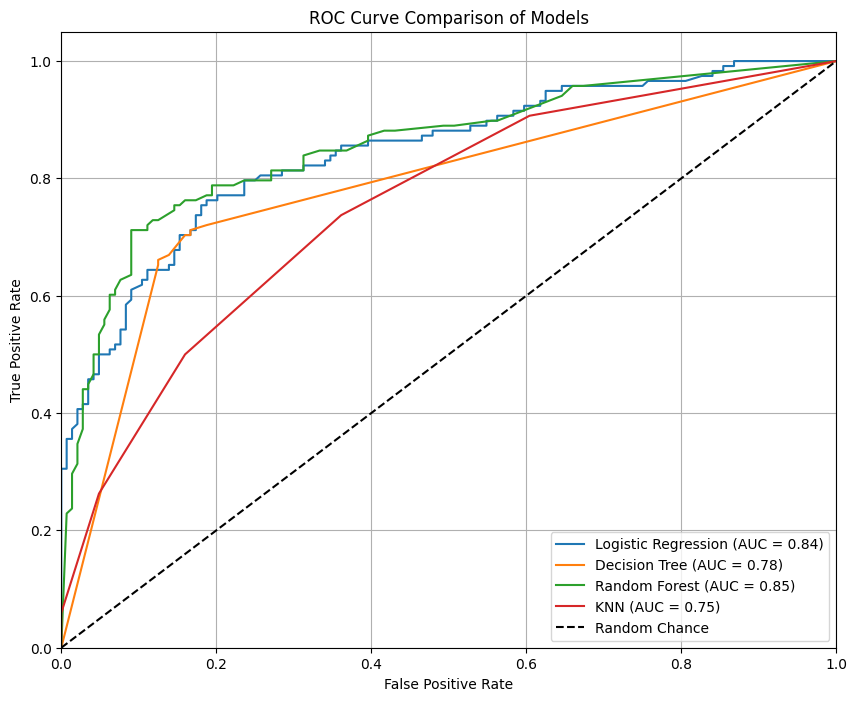

In [36]:
# Calculate the ROC and AUC for Each Model

peaceplt.figure(figsize=(10, 8))

for model_name, model in fitted_models.items():
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    peaceplt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

# Plot ROC Curve

peaceplt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
peaceplt.title("ROC Curve Comparison of Models")
peaceplt.xlabel("False Positive Rate")
peaceplt.ylabel("True Positive Rate")
peaceplt.xlim([0.0, 1.0])
peaceplt.ylim([0.0, 1.05])
peaceplt.legend()
peaceplt.grid(True)
peaceplt.show()

In [41]:
# Compare the Models

for model_name, model in fitted_models.items():
    y_pred_prob = model.predict(X_test)
    accuracy = roc_auc_score(y_test, y_pred_prob)
    print(f"{model_name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.76
Decision Tree Accuracy: 0.77
Random Forest Accuracy: 0.81
KNN Accuracy: 0.67


# **QUESTION 4 - ENSEMBLES FOR REGRESSION**

4.2 - Construct Random Forest Model for Red Wine Dataset showing the estimated optimal number of leaves

In [45]:
df_red_wine = peacepd.read_csv('winequality-red.csv', sep=';')
df_red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [46]:
# Select the Feature and Target variables

X = df_red_wine.drop('quality', axis=1)
y = df_red_wine['quality']

In [47]:
# Split the Dataset into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

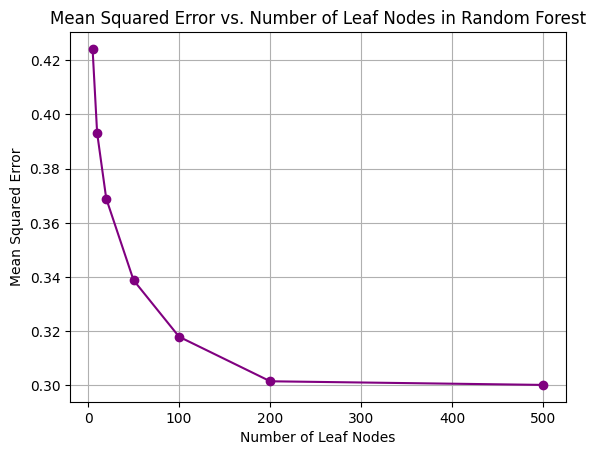

In [59]:
# Train Random Forest Model with different numbers of leaves

leaf_nodes = [5, 10, 20, 50, 100, 200, 500]
mse_scores = []

for leaf in leaf_nodes:
  rand_forest = RandomForestRegressor(n_estimators=100, max_leaf_nodes=leaf, random_state=42)
  rand_forest.fit(X_train, y_train)
  y_pred = rand_forest.predict(X_test)
  mse = mean_squared_error(y_test, y_pred)
  mse_scores.append(mse)

peaceplt.plot(leaf_nodes, mse_scores, marker='o', linestyle='-', color='purple')
peaceplt.title("Mean Squared Error vs. Number of Leaf Nodes in Random Forest")
peaceplt.xlabel("Number of Leaf Nodes")
peaceplt.ylabel("Mean Squared Error")
peaceplt.grid(True)
peaceplt.show()

In [56]:
# leaf_nodes = [5, 10, 20, 50, 100, 200, 500]
# mse_scores = []

# for leaf in leaf_nodes:
#   rand_forest = RandomForestRegressor(n_estimators=100, min_samples_leaf=leaf, random_state=42)
#   rand_forest.fit(X_train, y_train)
#   y_pred = rand_forest.predict(X_test)
#   mse = mean_squared_error(y_test, y_pred)
#   mse_scores.append(mse)


# optimal_leaf_nodes = leaf_nodes[peacenp.argmin(mse_scores)]
# print(optimal_leaf_nodes)

5


In [60]:
# Construct Random Forest model with optimal number of leaves

optimal_leaf_nodes = 20
rand_forest = RandomForestRegressor(n_estimators=100, max_leaf_nodes=optimal_leaf_nodes, random_state=42)
rand_forest.fit(X_train, y_train)

# Make predictions for the evaluation of the model

y_pred_optimal = rand_forest.predict(X_test)
mse_optimal = mean_squared_error(y_test, y_pred_optimal)
print("Mean Squared Error with Optimal Leaf Nodes:", mse_optimal)

Mean Squared Error with Optimal Leaf Nodes: 0.3689440605612798


4.3 - Explain and show how the optimal number of trees was computed

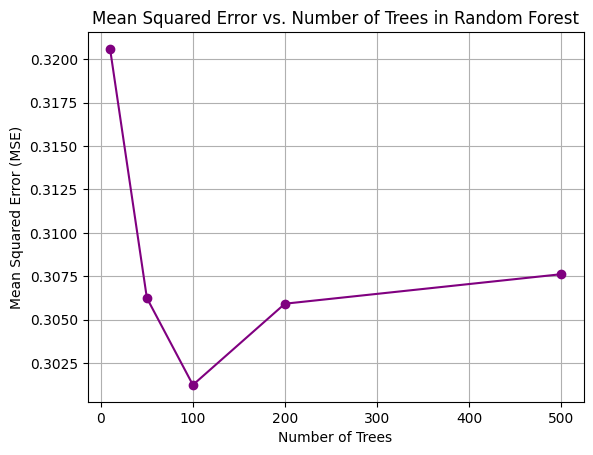

In [61]:
trees = [10, 50, 100, 200, 500]
trees_errors = []

for t in trees:
  rand_forest = RandomForestRegressor(n_estimators=t, random_state=42)
  rand_forest.fit(X_train, y_train)
  y_pred_trees = rand_forest.predict(X_test)
  mse_trees = mean_squared_error(y_test, y_pred_trees)
  trees_errors.append(mse_trees)

peaceplt.plot(trees, trees_errors, marker='o', linestyle='-', color='purple')
peaceplt.title("Mean Squared Error vs. Number of Trees in Random Forest")
peaceplt.xlabel("Number of Trees")
peaceplt.ylabel("Mean Squared Error (MSE)")
peaceplt.grid(True)
peaceplt.show()

In [62]:
# Construct Random Forest model with optimal number of trees

optimal_trees = 100
rand_forest_trees = RandomForestRegressor(n_estimators=optimal_trees, max_leaf_nodes=optimal_trees, random_state=42)
rand_forest_trees.fit(X_train, y_train)

# Make predictions for the evaluation of the model

y_pred_trees = rand_forest_trees.predict(X_test)
mse_trees = mean_squared_error(y_test, y_pred_trees)
print("Mean Squared Error with Optimal Number of Trees:", mse_trees)

Mean Squared Error with Optimal Number of Trees: 0.31796846624071373


4.4 - Provide a bar graph showing the importance of Each Feature

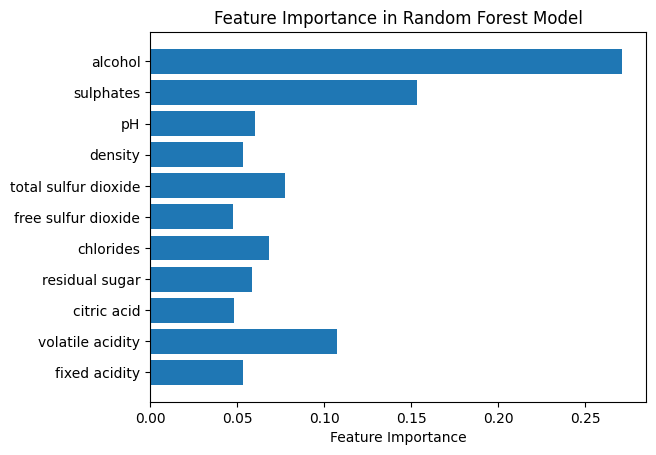

In [63]:
feat_importance = rand_forest.feature_importances_

# Create the bar graph
peaceplt.barh(X.columns, feat_importance)
peaceplt.xlabel("Feature Importance")
peaceplt.title("Feature Importance in Random Forest Model")
peaceplt.show()

4.5 - Evaluate the performance of Random Forest model and compare with Linear Regression and KNN

In [67]:
# For Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# For KNN Regression
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print(f'Mean Squared Error (MSE) for Linear Regression: {mse_linear}')
print(f'Mean Squared Error (MSE) for KNN Regression: {mse_knn}')
print(f'Mean Squared Error (MSE) for Random Forest: {mse_optimal}')

Mean Squared Error (MSE) for Linear Regression: 0.3900251439639545
Mean Squared Error (MSE) for KNN Regression: 0.5319999999999999
Mean Squared Error (MSE) for Random Forest: 0.3689440605612798
